In [1]:
import os
import csv
from matplotlib import rc
import matplotlib.pyplot as plt

In [4]:
optimizer = 'COBYLA'
path = f'results_{optimizer}'

In [5]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

In [6]:
files = [file for file in os.listdir(f'N=8') if file.endswith('.csv')]
for i, file in enumerate(files):
    alpha  = []
    energy = []

    with open(f'N=8/{file}', newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)

        for row in reader:
            alpha.append(float(row[0]))
            energy.append(float(row[1]))

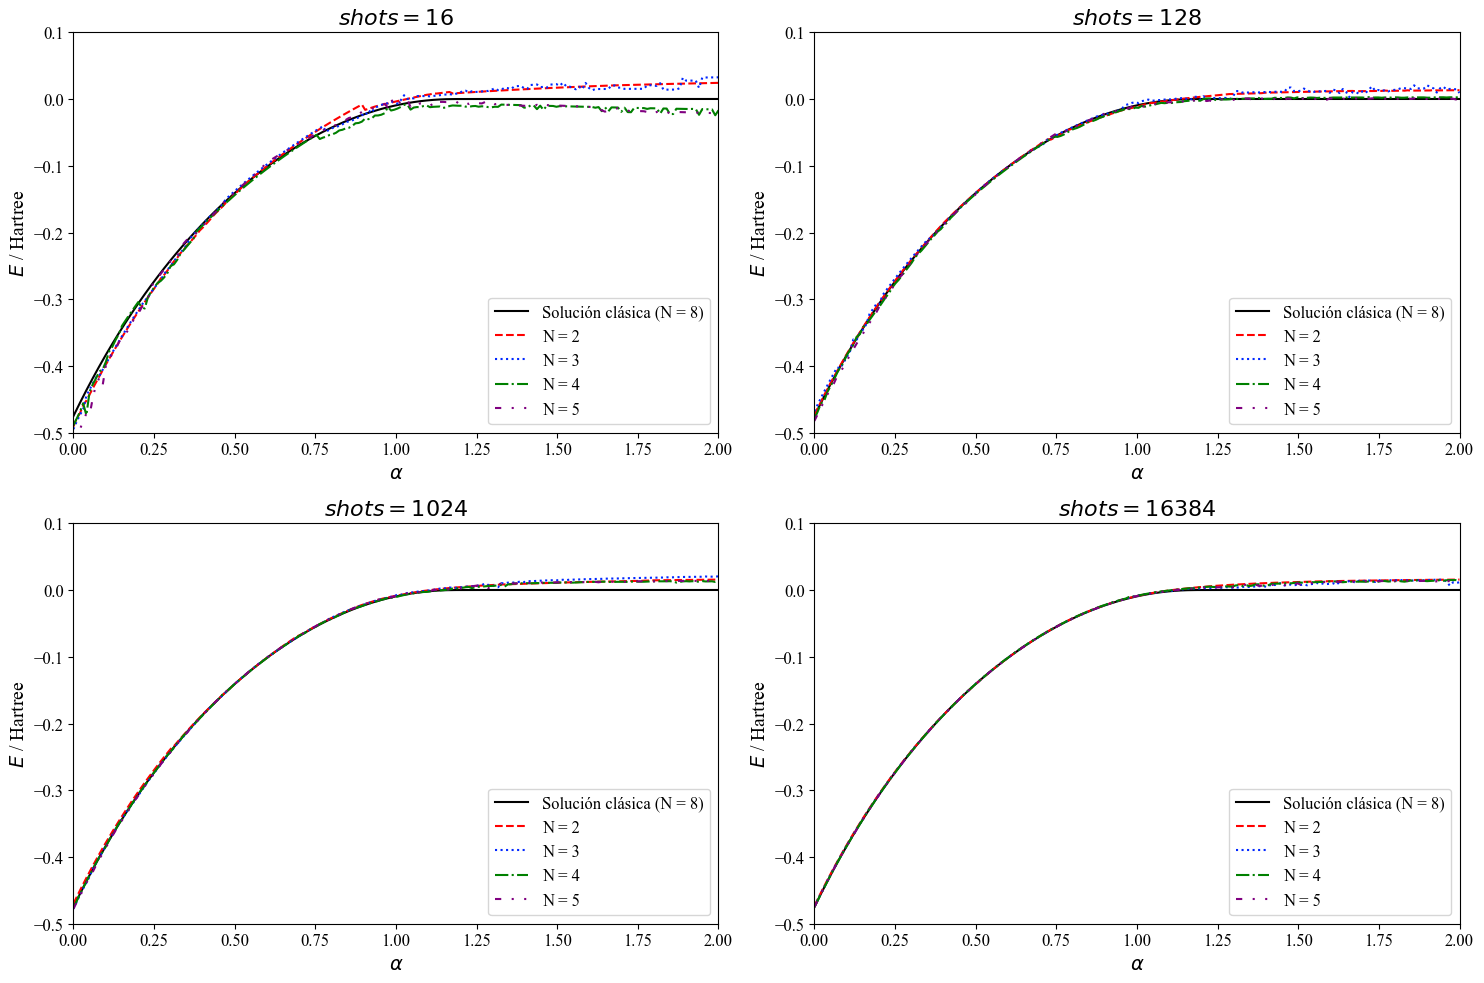

In [7]:
colors = ['red', '#0027FF', 'green', 'purple']
lines = ['--', ':', '-.', (0, (3, 5, 1, 5, 1, 5))]
folders = [folder for folder in os.listdir() if '.' not in folder]

rows = 2
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 10))

for n, folder in enumerate(folders):
    if os.path.exists(f'{folder}/{path}'):
        files = [file for file in os.listdir(f'{folder}/{path}') if file.endswith('.csv')]
        files = sorted(files, key=ordenar_por_numero)

        for i, file in enumerate(files):
            shots = int(file.split('=')[1].split('.')[0])

            alpha  = []
            energy_vqe = []

            with open(f'{folder}/{path}/{file}', newline='') as csvfile:
                reader = csv.reader(csvfile)
                next(reader)

                for row in reader:
                    alpha.append(float(row[0]))
                    energy_vqe.append(float(row[1]))


            row = i // columns
            column = i % columns

            if n == 0:
                axs[row, column].plot(alpha, energy, color='black', marker='', linestyle='-', label='Solución clásica (N = 8)')

            axs[row, column].plot(alpha, energy_vqe, color=colors[n], marker='', linestyle=lines[n], label=f'N = {folder.split('=')[1]}')
            axs[row, column].set_title(f'$shots = {shots}$', fontsize=16)
            axs[row, column].set_xlabel(r'$\alpha$', fontsize=14)
            axs[row, column].set_ylabel('$E$ / Hartree', fontsize=14)
            axs[row, column].grid(False)
            axs[row, column].set_xlim(0, 2)
            axs[row, column].set_ylim(-0.5, 0.1)
            axs[row, column].legend(loc='lower right')
    

plt.tight_layout()
plt.savefig(f'yuwaka_aer_COBYLA_plot_anexo.png')
plt.savefig(f'../../../TFG/Figuras/yuwaka_aer_COBYLA_plot_anexo.png')
plt.show()

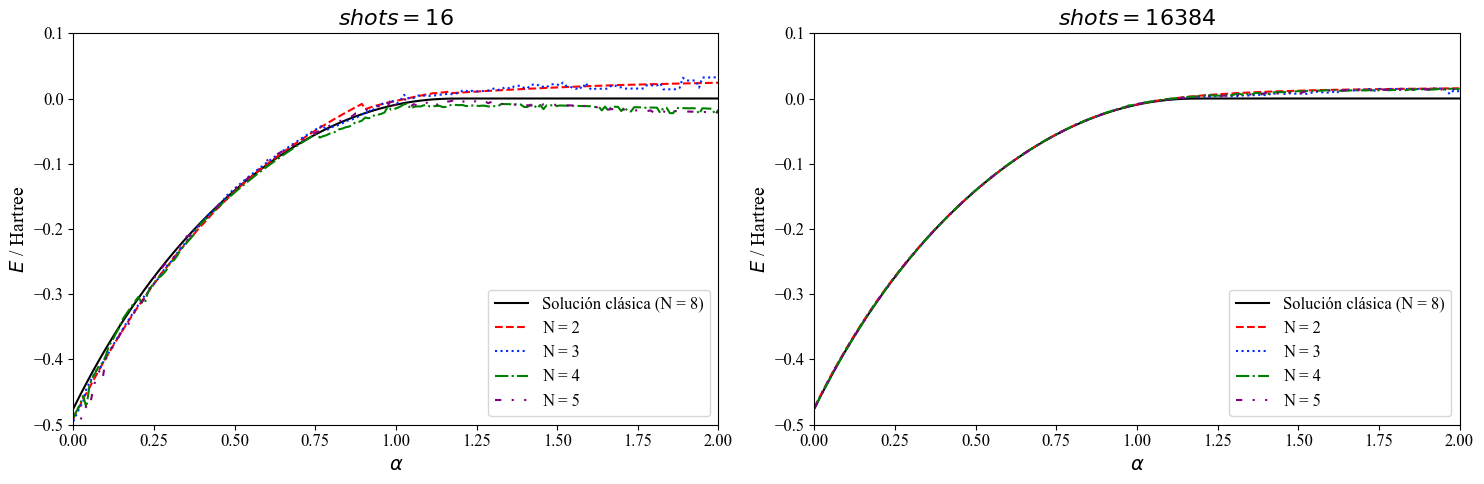

In [10]:
colors = ['red', '#0027FF', 'green', 'purple']
lines = ['--', ':', '-.', (0, (3, 5, 1, 5, 1, 5))]
folders = [folder for folder in os.listdir() if '.' not in folder]

rows = 1
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 5))

for n, folder in enumerate(folders):
    if os.path.exists(f'{folder}/{path}'):
        files = [file for file in os.listdir(f'{folder}/{path}') if file.endswith('.csv') and ('16' in file or '16384' in files)]
        files = sorted(files, key=ordenar_por_numero)

        for i, file in enumerate(files):
            shots = int(file.split('=')[1].split('.')[0])

            alpha  = []
            energy_vqe = []

            with open(f'{folder}/{path}/{file}', newline='') as csvfile:
                reader = csv.reader(csvfile)
                next(reader)

                for row in reader:
                    alpha.append(float(row[0]))
                    energy_vqe.append(float(row[1]))


            row = i // columns
            column = i % columns

            if n == 0:
                axs[column].plot(alpha, energy, color='black', marker='', linestyle='-', label='Solución clásica (N = 8)')

            axs[column].plot(alpha, energy_vqe, color=colors[n], marker='', linestyle=lines[n], label=f'N = {folder.split('=')[1]}')
            axs[column].set_title(f'$shots = {shots}$', fontsize=16)
            axs[column].set_xlabel(r'$\alpha$', fontsize=14)
            axs[column].set_ylabel('$E$ / Hartree', fontsize=14)
            axs[column].grid(False)
            axs[column].set_xlim(0, 2)
            axs[column].set_ylim(-0.5, 0.1)
            axs[column].legend(loc='lower right')
    

plt.tight_layout()
plt.savefig(f'yuwaka_aer_COBYLA_plot.png')
plt.savefig(f'../../../TFG/Figuras/yuwaka_aer_COBYLA_plot.png')
plt.show()